# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
# %tb

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
import pandas as pd

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/lab", "2022-12-07-fps-5-scene-21.dll")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

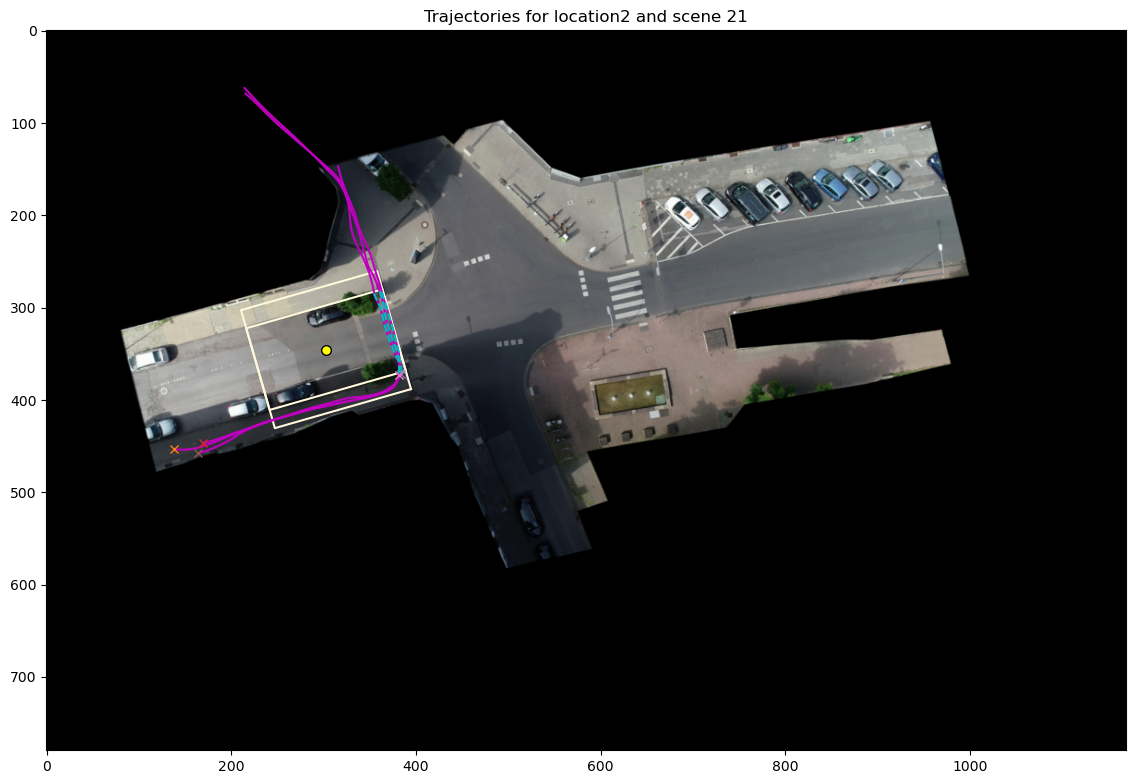

In [5]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[18339, 26161, 27374])

In [6]:
# visualize all peds
# from math import ceil
# allPedIds = sceneData.uniquePedIds()
# limit = 50
# nPedIds = len(allPedIds)
# nPages = ceil(nPedIds / limit)
# for page in range(nPages):
#     offset = page * limit
#     visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)

In [7]:
# problemId = allPedIds[411]
problemId = 18339

problemTrack = pedDf[pedDf["uniqueTrackId"] == problemId]
# problemId

In [8]:
print(TrajectoryUtils.length(problemTrack, xCol="sceneX", yCol="sceneY"))

9.09849886791945


In [10]:
# print(allPedIds)

## Testing splitting long trajectories

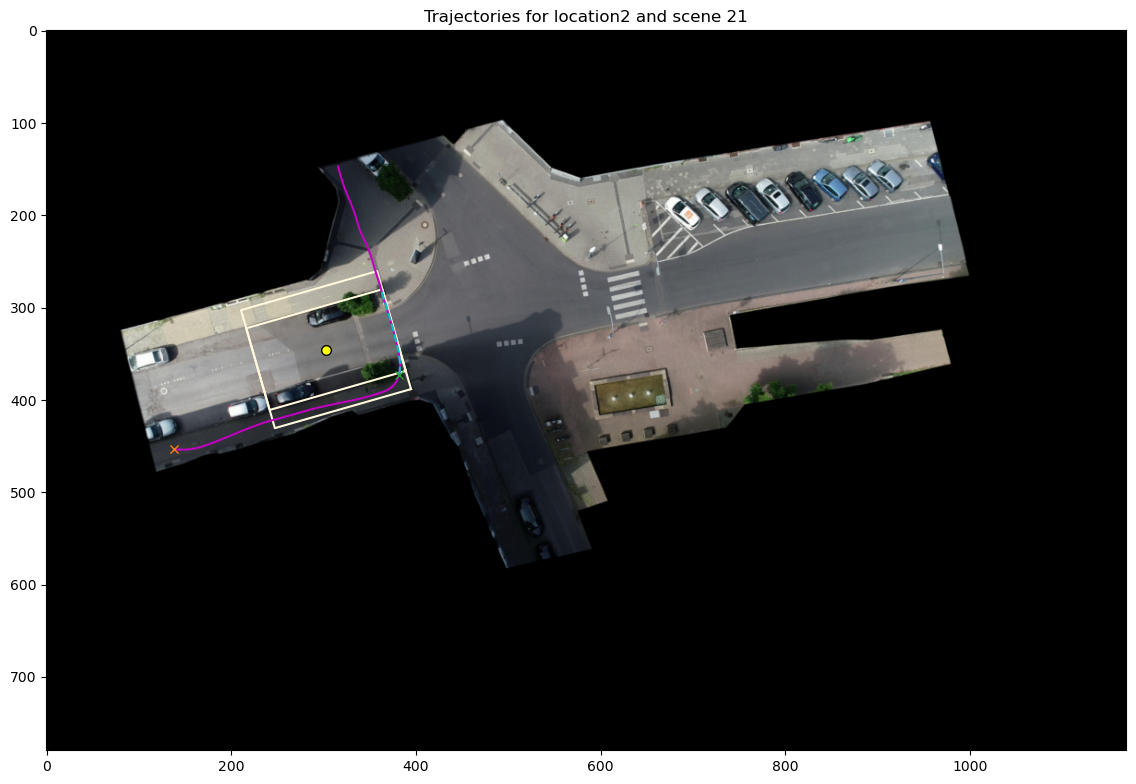

In [11]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[18339])

In [12]:
trackDf = sceneData.pedData[sceneData.pedData["uniqueTrackId"]==18339]
trackDf.tail()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth
513,9678,18,339,22979,725,14.8261,-44.34469,185.94656,0.0,0.0,-1.65353,-0.11958,0.01807,0.35252,18339,21,9.0
514,9679,18,339,22984,730,14.4922,-44.36067,183.95115,0.0,0.0,-1.64979,-0.05375,0.02633,0.31639,18339,21,9.0
515,9680,18,339,22989,735,14.16297,-44.36455,181.94671,0.0,0.0,-1.63877,0.00413,0.02053,0.28948,18339,21,9.0
516,9681,18,339,22994,740,13.83996,-44.35874,179.94454,0.0,0.0,-1.63775,0.05696,0.00419,0.27754,18339,21,9.0
517,9682,18,339,22999,745,13.50986,-44.34353,177.95051,0.0,0.0,-1.63991,0.11113,0.00097,0.2762,18339,21,9.0


number of tracks 1


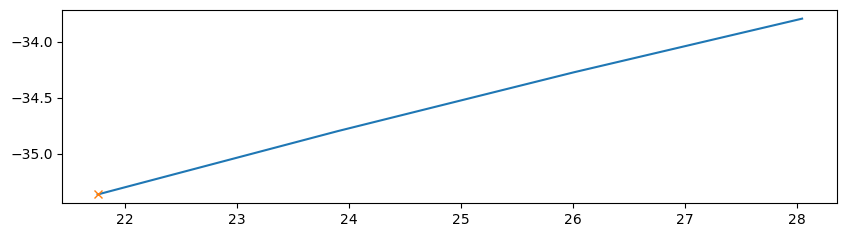

In [21]:

scenePolygon = TrajectoryUtils.scenePolygon(
    sceneData.sceneConfig, 
    sceneData.sceneConfig["boxWidth"], 
    sceneData.sceneConfig["roadWidth"] + 4
)
# print(scenePolygon)

brokenTracks = TrajectoryUtils.clipByRectWithSplits(
    trackDf, 
    xCol="xCenter",
    yCol="yCenter",
    frameCol="frame",
    rect=scenePolygon
)
print('number of tracks', len(brokenTracks))
visualizer.showLocalTrajectories(
    pd.concat(brokenTracks), 
    idCol="uniqueTrackId", 
    xCol="xCenter",
    yCol="yCenter"
)

1

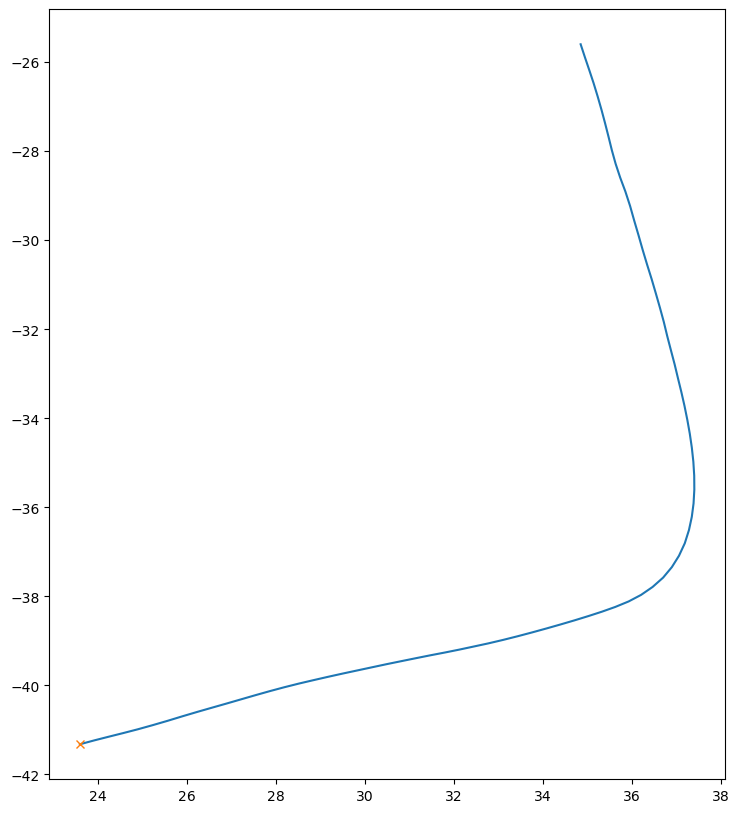

In [16]:
from collections import defaultdict
sceneData.problematicIds = defaultdict(lambda : set([]))
sceneData.warnings = []
sceneData._clipPed(0)

clipping ped trajectories for scene # 21 with width offset 0: 100%|████████████████████| 70/70 [00:01<00:00, 46.80it/s]


In [31]:

sceneData._clipOther()

clipping other trajectories for scene # 21: 100%|██████████████████████████████████| 2287/2287 [01:31<00:00, 25.04it/s]


In [32]:
sceneData.warnings

['pedestrian 18074: enters the scene 2 times',
 'pedestrian 18116: enters the scene 2 times',
 'pedestrian 22531: enters the scene 2 times',
 'pedestrian 29529: enters the scene 2 times',
 'car 19239: Disregarding as the length 5.3025361997008424 is too short or rows too less (7)',
 'car 19239: ERROR: No valid clipped trajectory',
 'bicycle 20107: enters the scene 2 times',
 'bicycle 20107: Disregarding as the length 7.1837414517960685 is too short or rows too less (13)',
 'bicycle 20112: enters the scene 2 times',
 'bicycle 20112: Disregarding as the length 8.413940648237359 is too short or rows too less (36)',
 'bicycle 20300: enters the scene 2 times',
 'bicycle 20300: Disregarding as the length 5.9846183353973395 is too short or rows too less (34)',
 'car 22000: ERROR: No clipped trajectory',
 'car 22000: ERROR: No valid clipped trajectory',
 'car 22002: ERROR: No clipped trajectory',
 'car 22002: ERROR: No valid clipped trajectory',
 'car 23564: Disregarding as the length 5.637779

In [ ]:
print(len(sceneData.uniquePedIds()))
print(len(sceneData.uniqueClippedPedIds()))

In [ ]:

visualizer.showLocationSceneData(
    sceneData, 
    onlyClipped=False, 
    showLocal=False, 
    showOthers=True, 
    ids=sceneData.problematicIds['pedestrian'])

In [ ]:
for problemId in sceneData.problematicIds['pedestrian']:
    
    trackDf = sceneData.pedData[sceneData.pedData["uniqueTrackId"] == problemId]
    print(problemId, trackDf.iloc[0]['frame'], trackDf.iloc[-1]['frame'])
    visualizer.showLocationSceneData(
        sceneData, 
        onlyClipped=False, 
        showLocal=False, 
        showOthers=True, 
        ids=[problemId])

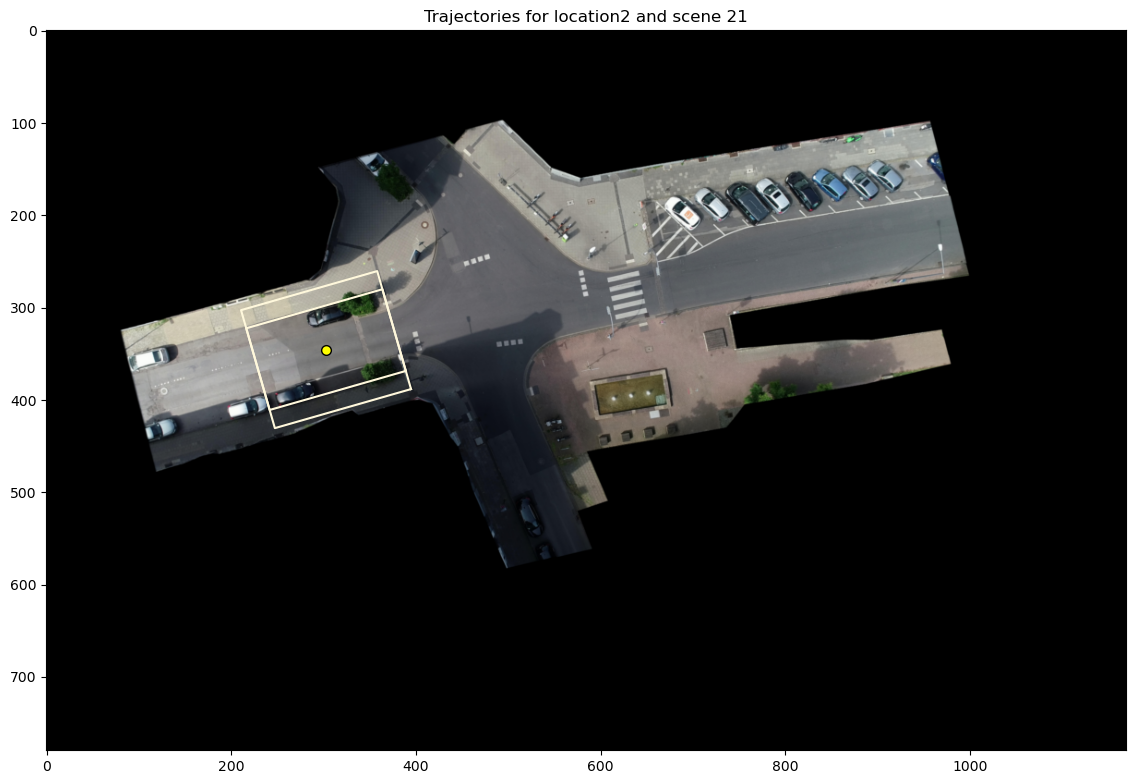

In [19]:

visualizer.showLocationSceneData(
    sceneData, 
    onlyClipped=False, 
    showLocal=False, 
    showOthers=True, 
    ids=[25284, 19240])

19239 16726 16756


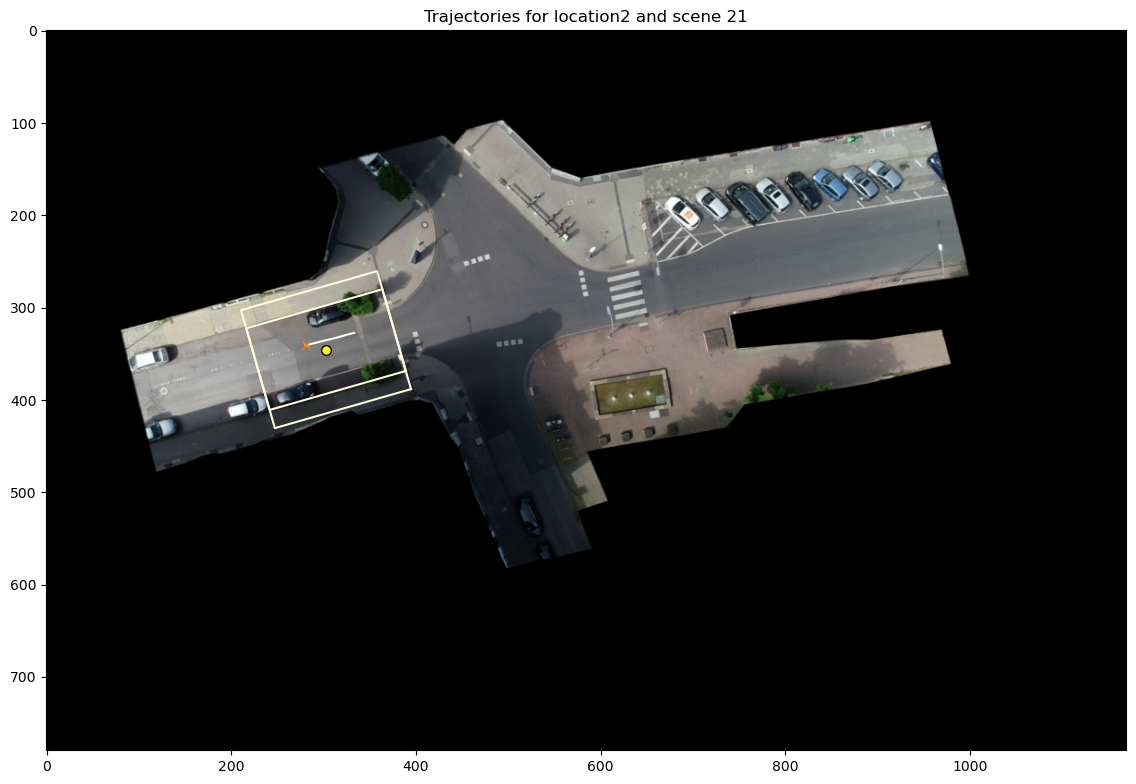

25003 0 265


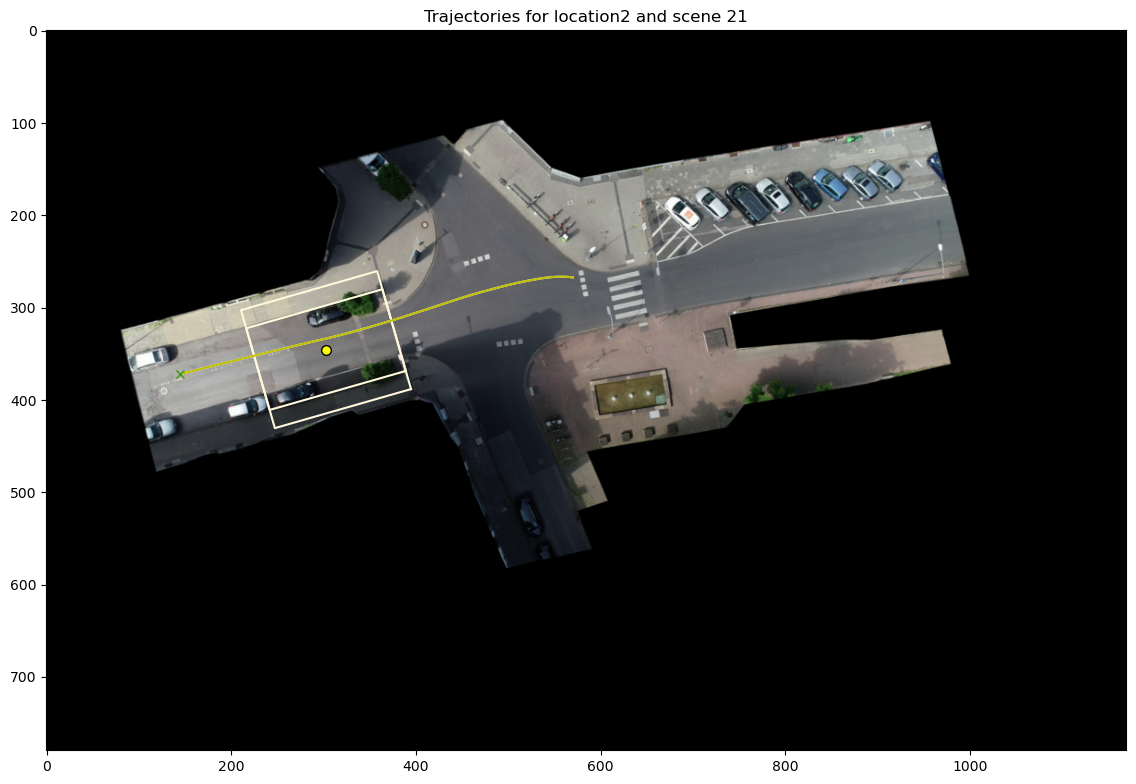

In [ ]:
for problemId in sceneData.problematicIds['car']:
    
    trackDf = sceneData.otherData[sceneData.otherData["uniqueTrackId"] == problemId]
    print(problemId, trackDf.iloc[0]['frame'], trackDf.iloc[-1]['frame'])
    visualizer.showLocationSceneData(
        sceneData, 
        onlyClipped=False, 
        showLocal=False, 
        showOthers=True, 
        ids=[problemId])

25003 0 265


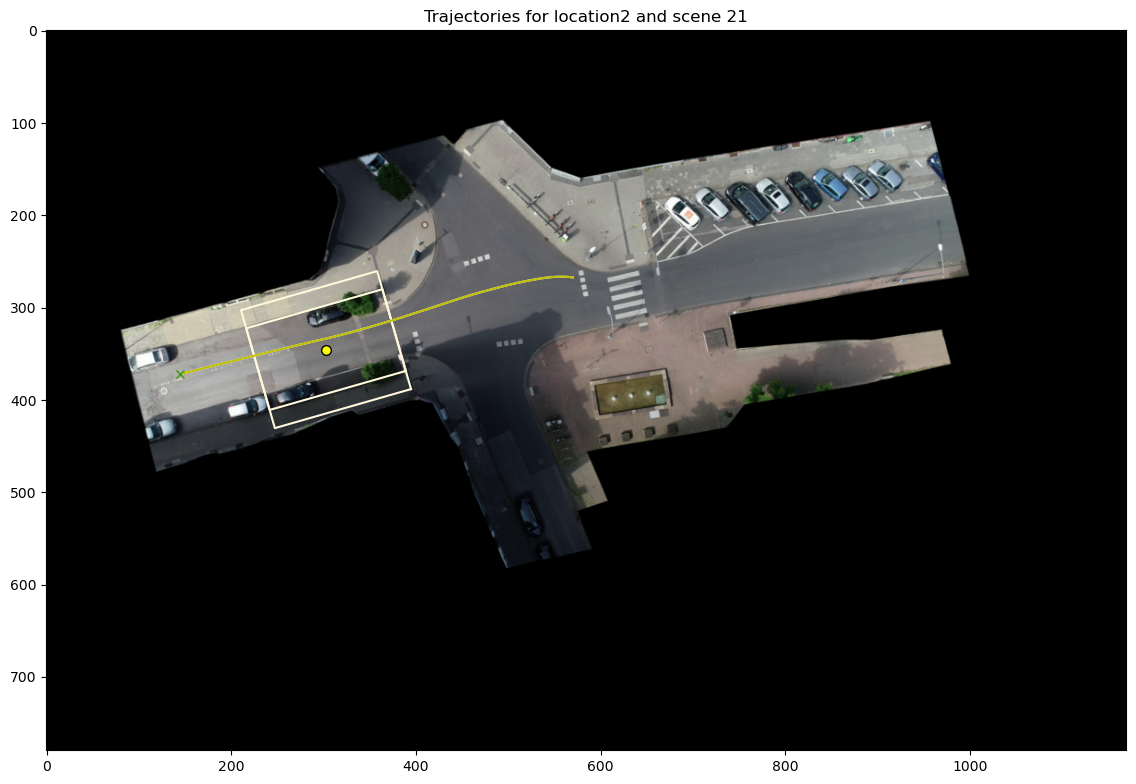

In [34]:
problemId = 25003
trackDf = sceneData.otherData[sceneData.otherData["uniqueTrackId"] == problemId]
print(problemId, trackDf.iloc[0]['frame'], trackDf.iloc[-1]['frame'])
visualizer.showLocationSceneData(
    sceneData, 
    onlyClipped=False, 
    showLocal=False, 
    showOthers=True, 
    ids=[problemId])

number of tracks 1


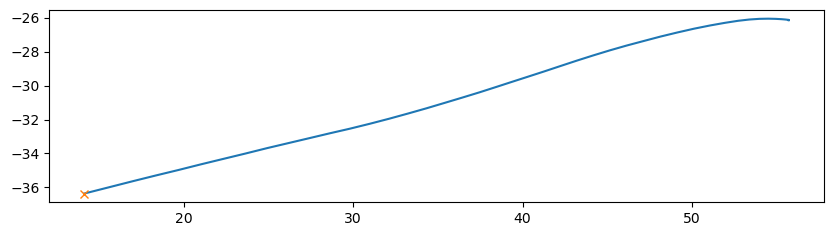

In [29]:
trackDf = sceneData.otherData[sceneData.otherData["uniqueTrackId"]==problemId]
scenePolygon = TrajectoryUtils.scenePolygon(
    sceneData.sceneConfig, 
    sceneData.sceneConfig["boxWidth"] + 40, 
    sceneData.sceneConfig["roadWidth"] + 12
)
# print(scenePolygon)

brokenTracks = TrajectoryUtils.clipByRectWithSplits(
    trackDf, 
    xCol="xCenter",
    yCol="yCenter",
    frameCol="frame",
    rect=scenePolygon
)
print('number of tracks', len(brokenTracks))
visualizer.showLocalTrajectories(
    pd.concat(brokenTracks), 
    idCol="uniqueTrackId", 
    xCol="xCenter",
    yCol="yCenter"
)